Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data.

It assigns a unique integer to each category in the data, making it suitable for machine learning models that work with numerical inputs.

import numpy as np
import pandas as pd

df = pd.read_csv('../../data/Iris.csv')
df['species'].unique()
"""outcome
array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)
"""
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['species']= label_encoder.fit_transform(df['species'])

df['species'].unique()

""outcome
array([0, 1, 2], dtype=int64)
""
pros:
Label Encoding is straightforward to use. It requires less preprocessing because it directly converts each unique category into a numeric value.

Label Encoding works well for ordinal data, where the order of categories is meaningful (e.g., Low, Medium, High). The numerical representation saves the relationship between categories
Example: (Low = 0, Medium = 1, High = 2), which helps the model understand their ranking or progression. It avoids unnecessary computations, making it both efficient and relevant in such cases.

limitations:
If the encoded values imply a relationship (e.g., Red = 0 and Blue = 2 might suggest Red < Blue), the model may incorrectly interpret the data as ordinal. To address this, we consider using One-Hot Encoding.




OneHotEncoder:
Real-life datasets often have categorical and numerical columns.
Machine learning models need numerical data, requiring conversion of categorical data.
Label encoding can introduce bias; one-hot encoding is a better approach.
One-hot-encoding creates separate columns for each category, using binary values.
One-hot encoding prevents ordinality issues and improves model performance.

Challenges with one-hot encoding: 
increases dimensionality, complexity, slow training, and risk of overfitting.

Important to use encoding methods cautiously to avoid overfitting.

Steps to implement one-hot encoding in Python: import libraries, read CSV, create dataframe, get unique elements, count values.

Two methods for one-hot encoding in Python:
Using Pandas library with pd.get_dummies().
Using scikit-learn library with OneHotEncoder().

In [17]:
"""get_dummies()."""
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = {
    'Employee id': [10, 20, 15, 25, 30],
    'Gender': ['M', 'F', 'F', 'M', 'F'],
    'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice']
}
df = pd.DataFrame(data)
categorical_columns = df[["Gender","Remarks"]]
print(f"Original Employee Data:\n{df}\n")
# Use pd.get_dummies() to one-hot encode the categorical columns
df_pandas_encoded = pd.get_dummies(df, columns=['Gender', 'Remarks'], drop_first=True)
print(f"One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n")

Original Employee Data:
   Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice

One-Hot Encoded Data using Pandas:
   Employee id  Gender_M  Remarks_Great  Remarks_Nice
0           10      True          False         False
1           20     False          False          True
2           15     False          False         False
3           25      True           True         False
4           30     False          False          True



OneHotEncoder()
Using df.select_dtypes(include=['object']) in Scikit Learn Library:
This selects only the columns with categorical data (data type object).
In this case, ['Gender', 'Remarks'] are identified as categorical columns.

In [33]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = {'Employee id': [10, 20, 15, 25, 30],
        'Gender': ['M', 'F', 'F', 'M', 'F'],
        'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice'],
        }
df = pd.DataFrame(data)
print(f"Employee data : \n{df}")
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False) # instatiate 
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder
                          .get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1) # combine df's with columns
print(f"Encoded Employee data : \n{df_encoded}")

Employee data : 
   Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice
Encoded Employee data : 
   Employee id Gender Remarks  Gender_F  Gender_M  Remarks_Good  \
0           10      M    Good       0.0       1.0           1.0   
1           20      F    Nice       1.0       0.0           0.0   
2           15      F    Good       1.0       0.0           1.0   
3           25      M   Great       0.0       1.0           0.0   
4           30      F    Nice       1.0       0.0           0.0   

   Remarks_Great  Remarks_Nice  
0            0.0           0.0  
1            0.0           1.0  
2            0.0           0.0  
3            1.0           0.0  
4            0.0           1.0  


*Ordinal Encoding*
Overview:
Ordinal encoding converts ordered data into numerical values for computational use, crucial for machine learning algorithms.

Key Pointers:
Converts data categories like "small," "medium," "large" into numerical values.
Preserves the hierarchy among categories.
Essential for machine learning which requires numerical data.

***The important thing to remember is that these categories have a purposeful hierarchy. Here are some key terms to remember:***

Category: A group of similar things, like the movie ratings.
Ordinal Data: Data that has a natural order like movie ratings shirt sizes (small, medium, large), or video game difficulty levels (easy, normal, hard).
Encoding: Converting data into a format a computer can understand.

pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
data = {
    'Student': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Grade': ['A', 'B', 'C', 'A', 'B']
}
df = pd.DataFrame(data)
print(df)

    Student Grade
0    Alice     A
1      Bob     B
2  Charlie     C
3    David     A
4      Eva     B

encoder = OrdinalEncoder(categories=[['A', 'B', 'C']])
df['Grade_encoded'] = encoder.fit_transform(df[['Grade']])
print(df)

    Student  Grade       Grade_encoded
0    Alice     A            0.0
1      Bob     B            1.0
2  Charlie     C            2.0
3    David     A            0.0
4      Eva     B            1.0

In [35]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
"""load the "Titanic" dataset directly from a URL."""
# Load the Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)
print("Original Data:")
print(df.head())



Original Data:
   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


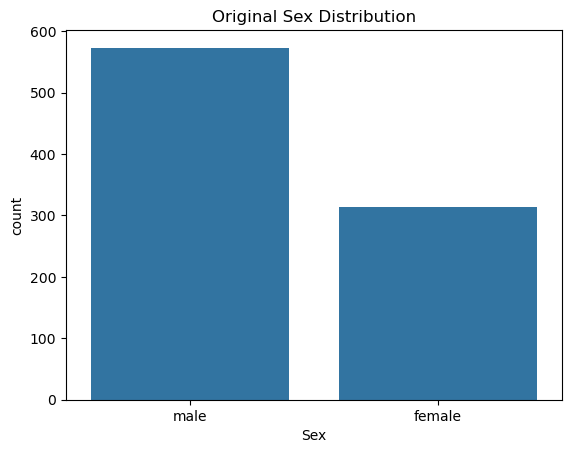

In [39]:
# Visualizing the 'Sex' column
sns.countplot(x='Sex', data=df)
plt.title('Original Sex Distribution')
plt.show()

In [41]:
# Initialize the OrdinalEncoder
encoder = OrdinalEncoder(categories=[['female', 'male']])
df['Sex_encoded'] = encoder.fit_transform(df[['Sex']])
print("\nEncoded Data:")
print(df[['Sex', 'Sex_encoded']].head())



Encoded Data:
      Sex  Sex_encoded
0    male          1.0
1  female          0.0
2  female          0.0
3  female          0.0
4    male          1.0


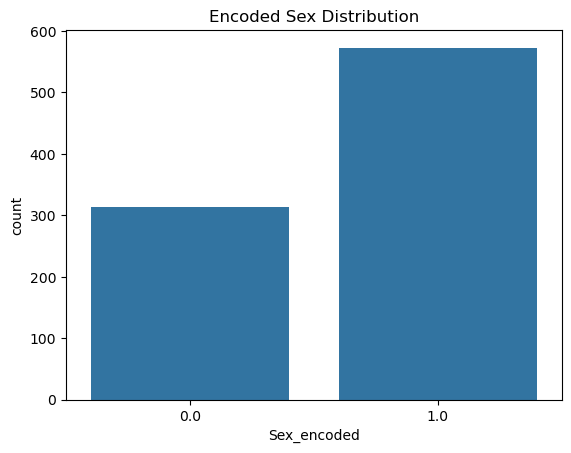

In [43]:
# Visualizing the encoded data
sns.countplot(x='Sex_encoded', data=df)
plt.title('Encoded Sex Distribution')
plt.show()


When the categories have a natural order, ordinal encoding is a simple yet effective method for turning categorical data into numerical representation. This procedure is significantly more accessible, when Sklearn is used.